In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 타이타닉 데이터셋을 이용하여 생존자 예측해보기

- [타이타닉 kaggle 데이터 소스](https://www.kaggle.com/competitions/titanic/data)

> 조건: 머신러닝 모델을 사용하지 않고, 최종 결과물 만들기

## 1. 타이타닉 train, test 데이터 불러오기

In [2]:
train = pd.read_csv('train.csv')

print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('test.csv')

print(test.shape)
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 2. 생존확률을 결정할 수 있는 변수를 탐색해보기

### 가설1. 좌석 등급인 Pclass가 좋을수록 생존 확률이 높았을 것

- Pclass 값이 작을수록 좋은 좌석을 나타내는 것 같음
- Pclass 값이 1인 경우에는 사망자보다 생존자가 더 많음을 알 수 있음
- 한편, 좌석 등급이 가장 좋지 않는 Pclass 값이 3인 경우에는 생존자보다 사망자가 압도적으로 많음

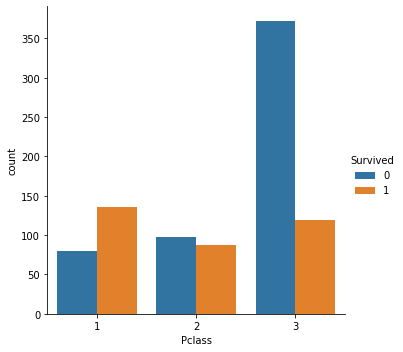

In [4]:
sns.catplot(x="Pclass", hue="Survived", kind="count", data=train)
plt.show()

### 가설2. Lady first 문화를 가지고 있었으므로, 남자보다 여자가 생존 확률이 높았을 것

- 남자와 여자의 생존 비율을 확인해봤을 때, 그 결과가 상반되는 것을 확인 할 수 있음
- 남자는 생존자보다 사망자가 압도적으로 많았지만, 여성의 경우에는 생존자가 더 많이 있었음

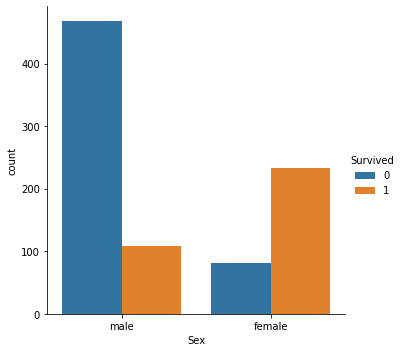

In [5]:
sns.catplot(x="Sex", hue="Survived", kind="count", data=train)
plt.show()

### 가설3. 나이가 매우 어리거나, 매우 많은 나이대에서 생존 확률이 높았을 것

- 나이라는 변수는, 성별이라는 변수와 함께 보아야 할 것 같음
- 일반적으로 재난상황에서 구출의 우선순위를 정의할 때, `노약자 및 어린이, 여성, 남성`과 같은 순서로 정의되는 것 같음
- 따라서 남성이면서 청년 또래의 나이대인 사람들은 생존 확률이 크게 높지 않았을 것으로 생각되고, 실제 결과도 그러함
- 남성은 나이가 20살 보다 적은 나이대에서는 생존자가 많이 있었지만, 그 이상의 나이대에서는 생존자가 많이 줄어들고 있음
- 하지만 여성의 경우에는 나이대에 상관 없이 생존자와 사망자가 고르게 분포되어 있는 모습을 보이고 있음

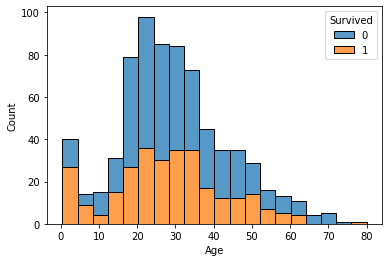

In [6]:
sns.histplot(x="Age", hue="Survived", data=train, multiple="stack")
plt.show()

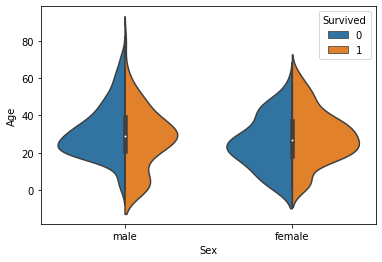

In [7]:
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train, split=True)
plt.show()

### 가설4. 좌석 요금인 Fare가 비쌀수록 생존 확률이 높았을 것

- Fare가 25 달러보다 적은 경우에는 생존자보다 사망자의 비율이 더 높음을 확인할 수 있음
- 한편, 50 달러 이상의 Fare를 지불한 고객들은 그 숫자도 많지 않을 뿐더러 생존자 비율도 높음

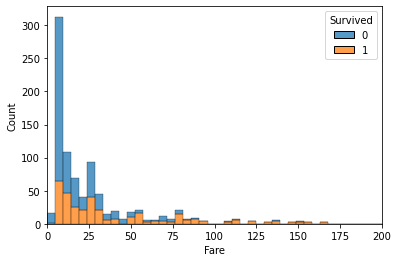

In [8]:
sns.histplot(x="Fare", hue="Survived", data=train, multiple="stack")
plt.xlim([0, 200])
plt.show()

## 3. 2번 과정의 가설을 통해 내릴 수 있는 결론

- **Sex**: 여성은 남성보다 생존 확률이 높음
- **Sex, Age**: 남성은 나이가 어릴 때 (20살 미만), 생존 확률이 높음
- **Pclass**: 좌석 등급이 좋을수록 (Pclass 값이 작을수록) 생존 확률이 높음
- **Fare**: 좌석 요금이 비쌀수록 (Fare 값이 클수록) 생존 확률이 높음

#### 위 조건들을 train 데이터를 통해 확인해보기

In [9]:
# 여성이면서, 좌석이 1등급인 사람
female_first_pclass = train[(train['Sex'] == 'female') & (train['Pclass'] == 1)].index
not_female_first_pclass = list(set(train.index) - set(female_first_pclass))

print(len(female_first_pclass), len(not_female_first_pclass), '=',
      len(female_first_pclass) + len(not_female_first_pclass), '\n')
print('여성 & 좌석 1등급인 사람의 생존 확률:', train.iloc[female_first_pclass, :]['Survived'].mean())
print('그 외에 사람들의 생존 확률:', train.iloc[not_female_first_pclass, :]['Survived'].mean())

94 797 = 891 

여성 & 좌석 1등급인 사람의 생존 확률: 0.9680851063829787
그 외에 사람들의 생존 확률: 0.31493099121706397


In [10]:
# 여성이면서, 좌석 요금이 $50 이상인 사람
female_expensive_fare = train[(train['Sex'] == 'female') & (train['Fare'] >= 50)].index
not_female_expensive_fare = list(set(train.index) - set(female_expensive_fare))

print(len(female_expensive_fare), len(not_female_expensive_fare), '=',
      len(female_expensive_fare) + len(not_female_expensive_fare), '\n')
print('여성 & 좌석 요금이 $50 이상인 사람의 생존 확률:', train.iloc[female_expensive_fare, :]['Survived'].mean())
print('그 외에 사람들의 생존 확률:', train.iloc[not_female_expensive_fare, :]['Survived'].mean())

87 804 = 891 

여성 & 좌석 요금이 $50 이상인 사람의 생존 확률: 0.9425287356321839
그 외에 사람들의 생존 확률: 0.32338308457711445


In [11]:
# 남성이면서, 나이가 20세 미만인 사람
male_young_age = train[(train['Sex'] == 'male') & (train['Age'] <= 20)].index
not_male_young_age = list(set(train.index) - set(male_young_age))

print(len(male_young_age), len(not_male_young_age), '=',
      len(male_young_age) + len(not_male_young_age), '\n')
print('남성 & 나이가 20세 미만인 사람의 생존 확률:', train.iloc[male_young_age, :]['Survived'].mean())
print('그 외에 사람들의 생존 확률:', train.iloc[not_male_young_age, :]['Survived'].mean())

102 789 = 891 

남성 & 나이가 20세 미만인 사람의 생존 확률: 0.28431372549019607
그 외에 사람들의 생존 확률: 0.39670468948035487


In [12]:
# 남성이면서, 나이가 10세 미만인 사람
male_young_age = train[(train['Sex'] == 'male') & (train['Age'] <= 10)].index
not_male_young_age = list(set(train.index) - set(male_young_age))

print(len(male_young_age), len(not_male_young_age), '=',
      len(male_young_age) + len(not_male_young_age), '\n')
print('남성 & 나이가 10세 미만인 사람의 생존 확률:', train.iloc[male_young_age, :]['Survived'].mean())
print('그 외에 사람들의 생존 확률:', train.iloc[not_male_young_age, :]['Survived'].mean())

33 858 = 891 

남성 & 나이가 10세 미만인 사람의 생존 확률: 0.5757575757575758
그 외에 사람들의 생존 확률: 0.3764568764568765


In [13]:
# 남성이면서, 나이가 5세 미만인 사람
male_young_age = train[(train['Sex'] == 'male') & (train['Age'] <= 5)].index
not_male_young_age = list(set(train.index) - set(male_young_age))

print(len(male_young_age), len(not_male_young_age), '=',
      len(male_young_age) + len(not_male_young_age), '\n')
print('남성 & 나이가 5세 미만인 사람의 생존 확률:', train.iloc[male_young_age, :]['Survived'].mean())
print('그 외에 사람들의 생존 확률:', train.iloc[not_male_young_age, :]['Survived'].mean())

23 868 = 891 

남성 & 나이가 5세 미만인 사람의 생존 확률: 0.6521739130434783
그 외에 사람들의 생존 확률: 0.37672811059907835


#### 위 조건들을 test 데이터를 통해 확인해보기

In [14]:
# 여성이면서, 좌석이 1등급인 사람
female_first_pclass = test[(test['Sex'] == 'female') & (test['Pclass'] == 1)].index
not_female_first_pclass = list(set(test.index) - set(female_first_pclass))

print(len(female_first_pclass), len(not_female_first_pclass), '=',
      len(female_first_pclass) + len(not_female_first_pclass), '\n')

test_output = test[['PassengerId']]
test_output['Survived'] = 0
test_output.loc[female_first_pclass, 'Survived'] = 1

print(test_output['Survived'].sum())
test_output
# test 데이터셋의 성능 = 0.73205

50 368 = 418 

50


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [15]:
# 여성이면서, 좌석이 1등급이면서, 좌석 요금이 $30 이상인 사람
female_first_pclass = test[(test['Sex'] == 'female') & (test['Pclass'] == 1)].index
female_expensive_fare = test[(test['Sex'] == 'female') & (test['Fare'] >= 30)].index
female_first_pclass = list(set(list(female_first_pclass) + list(female_expensive_fare)))
not_female_first_pclass = list(set(test.index) - set(female_first_pclass))

print(len(female_first_pclass), len(not_female_first_pclass), '=',
      len(female_first_pclass) + len(not_female_first_pclass), '\n')

test_output = test[['PassengerId']]
test_output['Survived'] = 0
test_output.loc[female_first_pclass, 'Survived'] = 1

print(test_output['Survived'].sum())
test_output
# test 데이터셋의 성능 = 0.74401

63 355 = 418 

63


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [16]:
# 여성이면서 좌석이 1등급이거나, 남성이면서 나이가 5세 이하인 사람
female_first_pclass = test[(test['Sex'] == 'female') & (test['Pclass'] == 1)].index
female_expensive_fare = test[(test['Sex'] == 'male') & (test['Age'] <= 5)].index
female_first_pclass = list(set(list(female_first_pclass) + list(female_expensive_fare)))
not_female_first_pclass = list(set(test.index) - set(female_first_pclass))

print(len(female_first_pclass), len(not_female_first_pclass), '=',
      len(female_first_pclass) + len(not_female_first_pclass), '\n')

test_output = test[['PassengerId']]
test_output['Survived'] = 0
test_output.loc[female_first_pclass, 'Survived'] = 1

print(test_output['Survived'].sum())
test_output
# test 데이터셋의 성능 = 0.72966

55 363 = 418 

55


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [17]:
# 여성이면서 좌석이 1등급이거나, 남성이면서 나이가 5세 이하인 사람
female_first_pclass = test[(test['Sex'] == 'female') & (test['Pclass'] == 1)].index
female_expensive_fare = test[(test['Fare'] >= 300)].index
female_first_pclass = list(set(list(female_first_pclass) + list(female_expensive_fare)))
not_female_first_pclass = list(set(test.index) - set(female_first_pclass))

print(len(female_first_pclass), len(not_female_first_pclass), '=',
      len(female_first_pclass) + len(not_female_first_pclass), '\n')

test_output = test[['PassengerId']]
test_output['Survived'] = 0
test_output.loc[female_first_pclass, 'Survived'] = 1

print(test_output['Survived'].sum())
test_output
# test 데이터셋의 성능 = 0.72966

50 368 = 418 

50


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [18]:
test_output.to_csv('submission.csv', index=False)